# 결정 트리 무작정 해보기 - 붓꽃 데이터 분류

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(iris.data, \
                                                    iris.target, \
                                                    test_size=0.2, \
                                                    random_state=1, \
                                                    stratify=iris.target)

In [15]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
# 성능 평가
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))
acc = accuracy_score(y_test, y_pred)
acc

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


0.9666666666666667

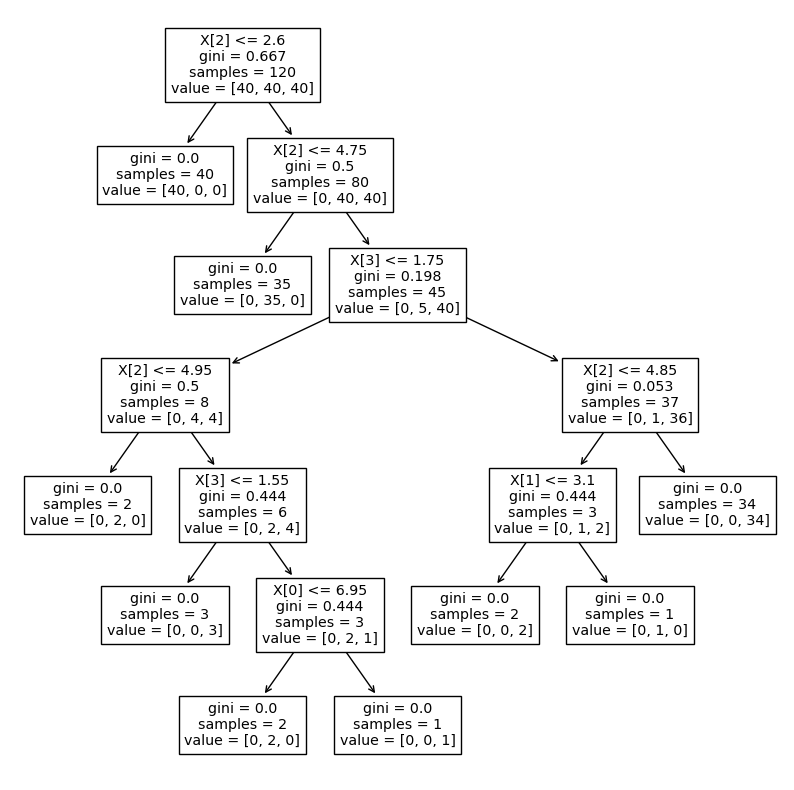

In [17]:
# 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,10))
plot_tree(dt);

## depth = 7인 결정트리


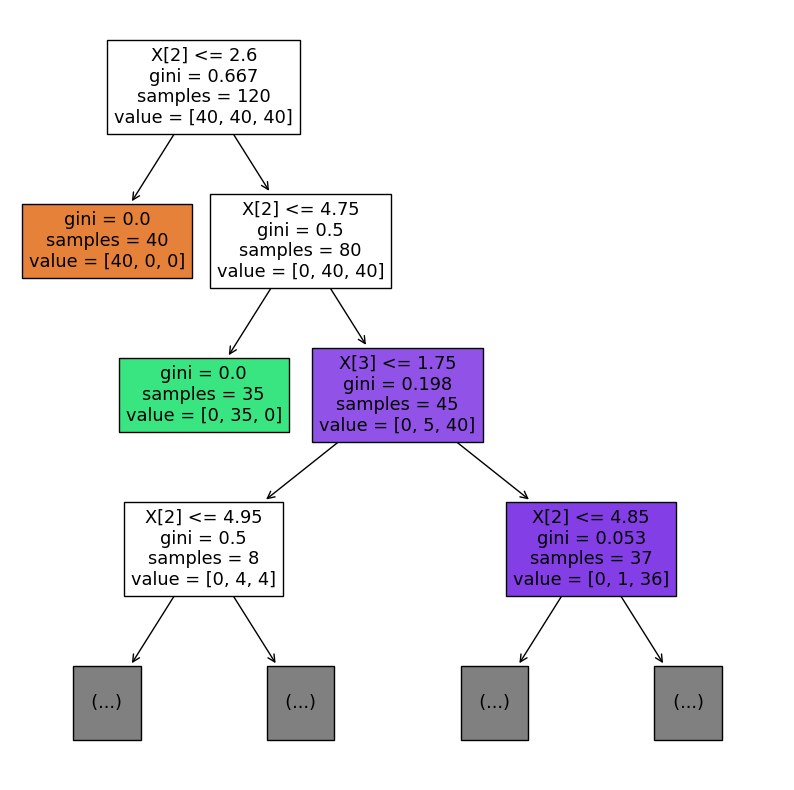

In [18]:
# 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,10))
plot_tree(dt, max_depth=3, filled=True);

## leaf(child가 없는 것 => 오렌지, 초록색)
## 뿌리(가장 상단에 있는 것)


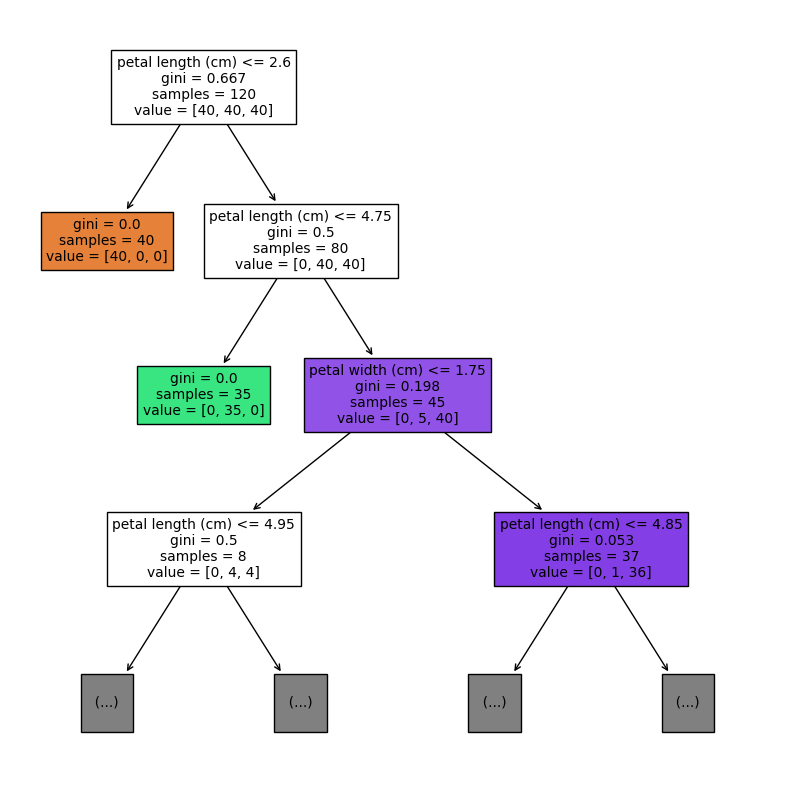

In [19]:
# 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,10))
plot_tree(dt, max_depth=3, filled=True, feature_names=iris.feature_names);

## 결정 트리 시각화 도구  - GraphViz

In [20]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [21]:
import graphviz

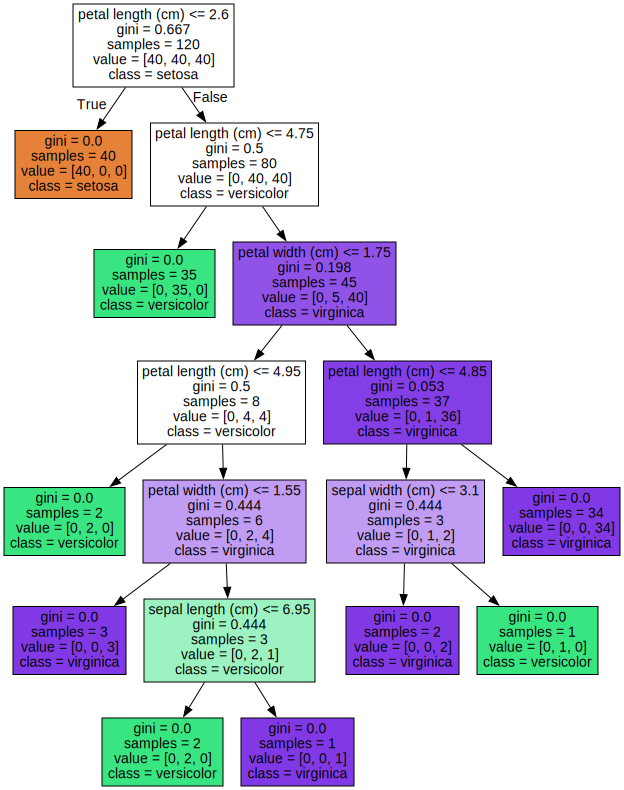

In [22]:
from sklearn.tree import export_graphviz
label_names=iris.target_names
#best_dt =grid.best_estimator
dot_data = export_graphviz(dt, out_file=None, class_names=label_names,\
                           feature_names = iris.feature_names,\
                           impurity=True, filled=True)

# Draw graph with png format , default pdf
graph = graphviz.Source(dot_data, format="png") 
graph

# 파일로 만드는 경우, 
#graph.render('tree')

In [23]:
# 시각화


#### Plot Decision Tree with dtreeviz Package

In [27]:
#!pip install dtreeviz

# 맥북에서 작동 안됨(설치는 되나 작동 안됨. 2023.02.07)
#from dtreeviz.trees import dtreeviz # remember to load the package

#viz = dtreeviz(dt, X_train, y_train,
#                target_name="target",
#                feature_names=iris.feature_names,
#                class_names=iris.target_names)

#viz
#to save files
#viz.save("decision_tree.svg")



## 결정 트리 실습 1) 와인 데이터 - Kaggle 와인 데이터를 일부 활용하여 사용

와인데이터 from Keggle
0이면 레드와인, 1이면 화이트 -> 전체 와인 중 화이트와인을 골라낸다

In [28]:
# 데이터 수집
import pandas as pd
wine_kaggle = pd.read_csv('/Users/kimminsoo/Desktop/ML/data/data_선형회귀/wine_dataset.csv')

In [29]:
wine_kaggle.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [30]:
wine_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [31]:
wine_kaggle.loc[0]

fixed_acidity              7.4
volatile_acidity           0.7
citric_acid                0.0
residual_sugar             1.9
chlorides                0.076
free_sulfur_dioxide       11.0
total_sulfur_dioxide      34.0
density                 0.9978
pH                        3.51
sulphates                 0.56
alcohol                    9.4
quality                      5
style                      red
Name: 0, dtype: object

In [32]:
wine_kaggle['style'].value_counts()
wine_kaggle['style'].value_counts(normalize=True)

white    0.753886
red      0.246114
Name: style, dtype: float64

In [33]:
# wine_kaggle의 alcohol, residual_sugar, pH, style 데이터만 사용

wine = wine_kaggle[['alcohol', 'residual_sugar', 'pH', 'style']]
wine.columns = ['alcohol', 'sugar', 'pH', 'style']
wine

,alcohol,sugar,pH,style
0,9.4,1.9,3.51,red
1,9.8,2.6,3.20,red
2,9.8,2.3,3.26,red
3,9.8,1.9,3.16,red
4,9.4,1.9,3.51,red
...,...,...,...,...
6492,11.2,1.6,3.27,white
6493,9.6,8.0,3.15,white
6494,9.4,1.2,2.99,white
6495,12.8,1.1,3.34,white


In [34]:
# 데이터 탐색
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   style    6497 non-null   object 
dtypes: float64(3), object(1)
memory usage: 203.2+ KB


In [35]:
wine.describe()

,alcohol,sugar,pH
count,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501
std,1.192712,4.757804,0.160787
min,8.000000,0.600000,2.720000
25%,9.500000,1.800000,3.110000
50%,10.300000,3.000000,3.210000
75%,11.300000,8.100000,3.320000
max,14.900000,65.800000,4.010000


In [36]:
# 데이터 준비, 분할
X = wine.drop('style', axis=1).values
y = wine['style'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                     random_state=42, 
                                                     stratify=y)
X_train.shape, X_test.shape

((5197, 3), (1300, 3))

In [37]:
print(pd.Series(y_train).value_counts(normalize=True))
print(pd.Series(y_test).value_counts(normalize=True))

white    0.753896
red      0.246104
dtype: float64
white    0.753846
red      0.246154
dtype: float64


In [38]:
# 특성 데이터 scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# 결정트리 모델 객체 생성, 학습, 평가
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = dt.predict(X_train_scaled)
train_score = accuracy_score(y_train, y_pred)

y_pred = dt.predict(X_test_scaled)
test_score = accuracy_score(y_test, y_pred)

print(f'train_score: {train_score:.2f}')
print(f'test_score: {test_score:.2f}')

train_score: 1.00
test_score: 0.86


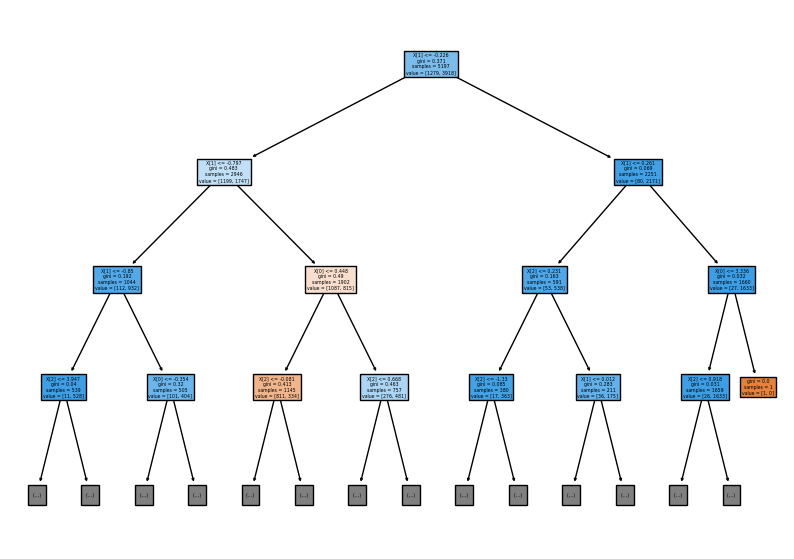

In [40]:
# 과적합 모델
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=3, filled=True);


### 결정트리와 과적합 및 규제

In [41]:
# Plot_tree()  트리 깊이 제한, 색깔 부여, 특성 이름 전달



* 가지치기 - 과적합 방지, (깊이 제한 ) 

In [42]:
dt_new = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_new.fit(X_train_scaled, y_train)

train_score = accuracy_score(y_train, dt_new.predict(X_train_scaled))
test_score = accuracy_score(y_test, dt_new.predict(X_test_scaled))
print(train_score)
print(test_score)

0.8458726188185491
0.8407692307692308


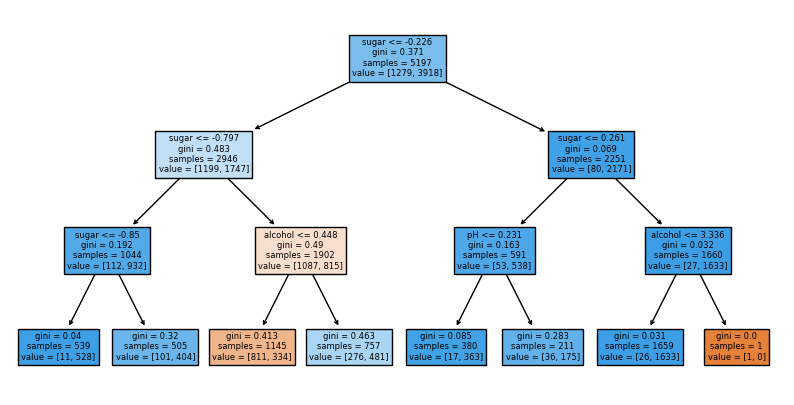

In [43]:
# 가지치기한 dt를 시각화
plt.figure(figsize=(10,5))
plot_tree(dt_new, filled=True, feature_names=wine.columns);

In [44]:
# 시각화 : plot_tree()
label_names = ['red', 'white']

dot_data = export_graphviz(dt, out_file=None, class_names=label_names, \
                           feature_names=['alcohol', 'sugar', 'pH'],
                           impurity=True, filled=True)
graph = graphviz.Source(dot_data, format='png')
graph.render('wine_kaggle')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.826385 to fit


'wine_kaggle.png'

* 결정 트리에서 특성 스케일링 필요성

In [45]:
# 표준화 스케일링 하지 않은 DT 시각화 -> 이해하기 쉽다

In [46]:
# 특성을 스케일링하지 않은 경우
# 1) max_depth 제한이 없는 경우
dt.fit(X_train, y_train)

train_score = accuracy_score(y_train, dt.predict(X_train))
test_score = accuracy_score(y_test, dt.predict(X_test))

print(train_score, test_score)

# 2) max_depth = 3으로 제한하는 경우
dt_new.fit(X_train, y_train)

train_score = accuracy_score(y_train, dt_new.predict(X_train))
test_score = accuracy_score(y_test, dt_new.predict(X_test))

print(train_score, test_score)

0.9978833942659227 0.8653846153846154
0.8458726188185491 0.8407692307692308


## 특성 중요도(feature_importances_)
- 어떤 특성이 가장 유용한 특성인지 나타냄
- feature_importances_  속성에 저장되어 있음

- 특성 중요도 계산 원리: 각 노드의 정보 이득 * 전체 샘플에 대한 비율을 곱한 후 특성별로 더하여 계산함
- 특성 중요도의 활용: 특성 선택에 활용(즉, 결정 트리 모델을 특성 선택에 활용)

In [47]:
import pandas as pd
pd.Series(dt.feature_importances_, index=wine.columns[:-1])

alcohol    0.233939
sugar      0.514503
pH         0.251558
dtype: float64

<AxesSubplot:>

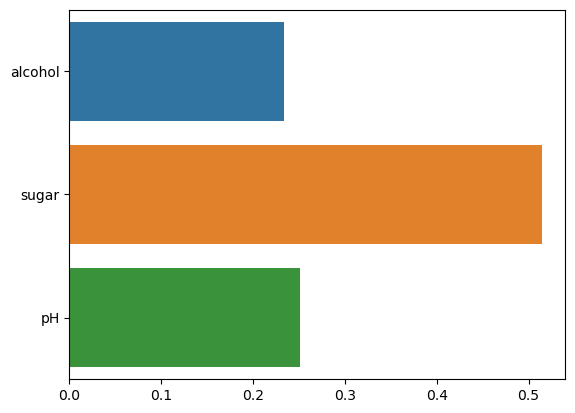

In [49]:
import seaborn as sns
sns.barplot(x=dt.feature_importances_, y=wine.columns[:-1])

## 결정 트리 실습 2) 붓꽃 데이터 

### 결정 트리 비교: Iris, 꽃받침 정보(너비와 길이)로 결정 트리를 만들어 위의 경우와 비교하라

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data[:, :2], iris.target,
                                                   test_size=0.2, random_state=1)


from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

In [ ]:
# 1분이상 걸림
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=3, filled=True, feature_names=iris.feature_names)
plt.show()

### 참고: 엔트로피를 사용하여 결정트리 만들기

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data[:, :2], iris.target,
                                                   test_size=0.2, random_state=1)


from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3, criterion='entropy')
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

In [ ]:
# 1분이상 걸림
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth=3, filled=True, feature_names=iris.feature_names)
plt.show()

### 결정 트리 모델의 시각화(Decision Tree Visualization)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
dot_data = export_graphviz(dt_clf, out_file=None, class_names=iris_data.target_names , \
    feature_names = iris_data.feature_names, impurity=True, filled=True)

import graphviz
graph = graphviz.Source(dot_data, format="png")
graph

# to save file
# graph.render("iris")

In [ ]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(dt_clf, iris.data, iris.target,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))

viz

#viz.save("decision_tree.svg")

In [ ]:
viz.save("decision_tree.svg")

### 결정 트리의 중요한 역할 피처: feature_importances_

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                   test_size=0.2, random_state=1)


from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

Feature importances:
[0.    0.    0.079 0.921]
sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.079
petal width (cm) : 0.921


<AxesSubplot: >

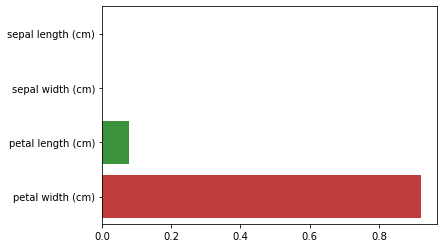

In [ ]:

import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris.feature_names , dt.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt.feature_importances_ , y=iris.feature_names)

### 결정 트리(Decision TREE) 과적합(Overfitting)
- 결정트리는 규칙 생성 로직을 미리 제어하지 않으면 완벽하게 클래스 값을 구별해내기 위해 트리노드를 계속해서 만들어 가므로 매우 복잡한 트리가 만들어져 쉽게 과적합된다.

- 결정트리 하이퍼파라미터 : 복잡한 트리 생성 방지 목적이 크다.

* max_depth: 결정 트리 최대 깊이 제한
* min_samples_split: 자식 노드를 분할하기 위한 최소한의 샘플데이터 수
* min_samples_leaf: 리프 노드가 될 수 있는 샘플 데이터 건수의 최소값( 지정한 갯수 이하의 샘플만 리프 노드가 될 수 있다)

# 교차검증과 그리드 서치로 이동

----------------------------------------------------------------------

# [실습] 타이타닉 데이터 결정트리 분류

* 타이타닉 데이터를 결정트리 알고리듬에 따라 분류하고, 로지스틱 회귀와 평가지표를 비교하라

######          여기까지 ###############

In [ ]:
#################################################

In [ ]:
#!pip install graphviz

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

In [ ]:
import os
os.environ['PATH']

In [ ]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [ ]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

In [ ]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

# 결정 트리 실습 - Human Activity Recognition

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])


**중복된 피처명을 확인**

In [ ]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

**원본 데이터에 중복된 Feature 명으로 인하여 신규 버전의 Pandas에서 Duplicate name 에러를 발생.**  
**중복 feature명에 대해서 원본 feature 명에 '_1(또는2)'를 추가로 부여하는 함수인 get_new_feature_name_df() 생성**

In [ ]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [ ]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

In [ ]:
print(y_train['action'].value_counts())

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)


In [ ]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]


In [ ]:
max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

In [ ]:
params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)


In [ ]:
?grid_cv


In [ ]:
?GridSearchCV

In [ ]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

In [ ]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()